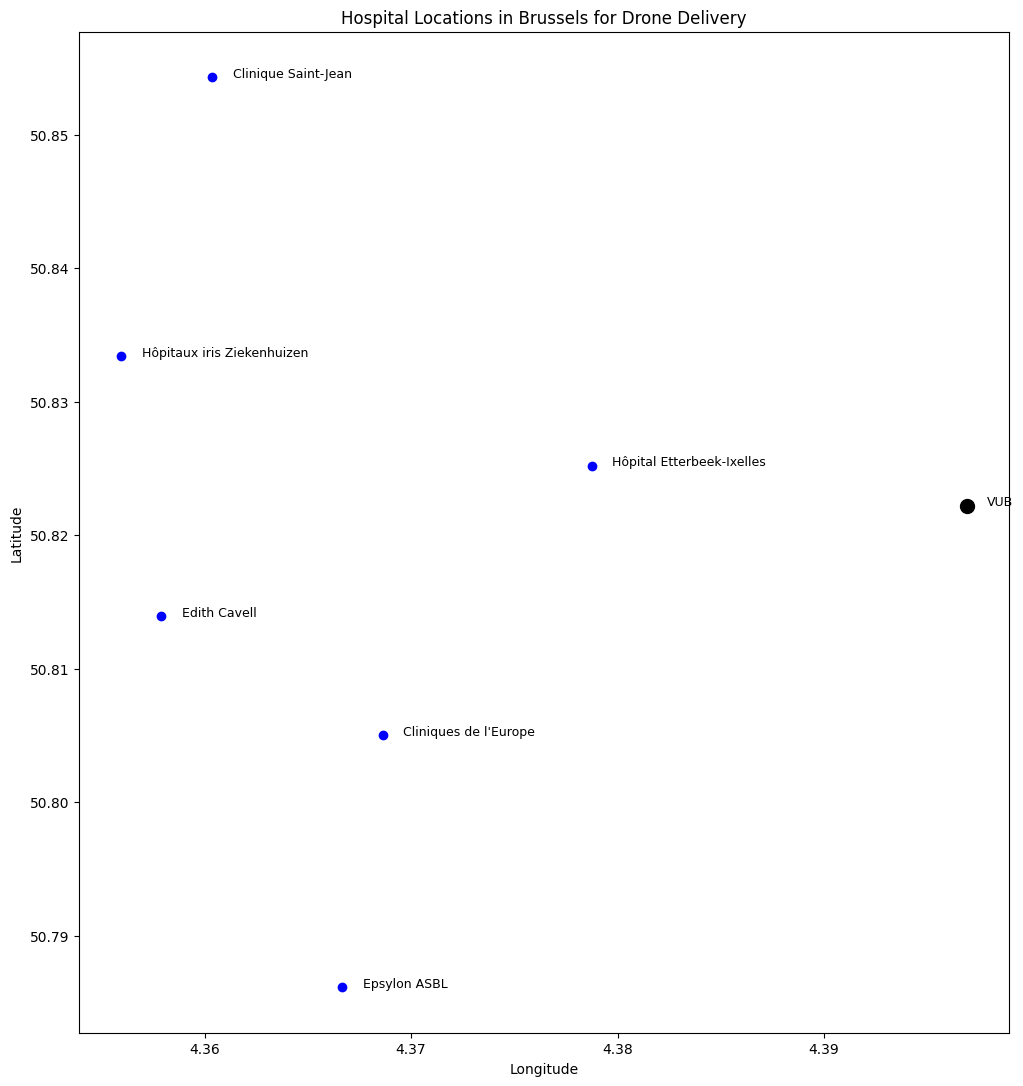

In [ ]:
import matplotlib.pyplot as plt

# Locations and coordinates
locations = [
    "VUB", "Edith Cavell", "Cliniques de l'Europe", 
    "Epsylon ASBL", "Hôpital Etterbeek-Ixelles", 
    "Clinique Saint-Jean", "Hôpitaux iris Ziekenhuizen"
]

coordinates = [
    (50.8222329, 4.3969074),  # VUB
    (50.8139343, 4.3578839),  # Edith Cavell
    (50.8050334, 4.3686235),  # Cliniques de l'Europe
    (50.7861456, 4.3666663),  # Epsylon ASBL
    (50.8252055, 4.3787444),  # Hôpital Etterbeek-Ixelles
    (50.8543172, 4.3603786),  # Clinique Saint-Jean
    (50.8334341, 4.3559617)   # Hôpitaux iris Ziekenhuizen
]

# Separate latitudes and longitudes
latitudes, longitudes = zip(*coordinates)

# Plot
plt.figure(figsize=(12, 13))
plt.scatter(longitudes, latitudes, color='blue', marker='o')

# Highlight VUB
plt.scatter(longitudes[0], latitudes[0], color='black', marker='o', s=100)  # Larger and black marker for VUB

# Annotate points
for i, location in enumerate(locations):
    plt.annotate(location, (longitudes[i] + 0.001, latitudes[i]), fontsize=9, ha='left')  # Annotate to the right with a slight offset

plt.title("Hospital Locations in Brussels for Drone Delivery")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [1]:
import folium
from geopy.distance import geodesic
from itertools import permutations

# Locations and coordinates
locations = [
    "VUB", "Edith Cavell", "Cliniques de l'Europe", 
    "Epsylon ASBL", "Hôpital Etterbeek-Ixelles", 
    "Clinique Saint-Jean", "Hôpitaux iris Ziekenhuizen"
]

coordinates = [
    (50.8222329, 4.3969074),  # VUB
    (50.8139343, 4.3578839),  # Edith Cavell
    (50.8050334, 4.3686235),  # Cliniques de l'Europe
    (50.7861456, 4.3666663),  # Epsylon ASBL
    (50.8252055, 4.3787444),  # Hôpital Etterbeek-Ixelles
    (50.8543172, 4.3603786),  # Clinique Saint-Jean
    (50.8334341, 4.3559617)   # Hôpitaux iris Ziekenhuizen
]

# Function to calculate the total route distance
def calculate_total_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += geodesic(route[i], route[i + 1]).km
    return total_distance

# Generate all possible routes (permutations)
all_routes = permutations(coordinates)

# Find the best route (shortest distance)
best_route = min(all_routes, key=lambda route: calculate_total_distance(route))

# Create a map centered around the first location (VUB)
map_center = best_route[0]
mymap = folium.Map(location=map_center, zoom_start=14)

# Plot the route on the map
for coord in best_route:
    folium.Marker(location=coord, popup="Location").add_to(mymap)

# Add a line between the points
route_line = folium.PolyLine(locations=best_route, color="blue", weight=2.5, opacity=1)
route_line.add_to(mymap)

# Display the map
mymap.save("optimal_route_map.html")
